<b><font size=6, color='teal'>EW Project
    
_________
    
Notebook by:Adriana Modelska [Rosa M. Vargas Martes helped me with the inital cells; reading in the first file]

    
__________
The work I have done before I started this project is as follows:
    - loading in the calusir NetCDF file that spans from 1984-2017. This dataset contains the variable brightness temperature.
    - Calculating the variance for the whole dataset, for each season and plotting it (once we had the plotting lecture I was able to go back and edit the plots knowing what I was actually doing and creating my own colorbar).
    
<b>For the project I will take what I have learned and move the research forward. What does that look like well...
1. I will laod in another different NetCDF dataset and understand what it contains. 
2. Calculate the climatology of a certain variable (mean of the total column water vapor (tcwv)) for the whole year, for certain months. 
3. Graph the climatology for a certain area I'm intersted as well as for the tropics.
4. Ultimately creating an atlas; each months climatology.
5. Combine both the variance from before and the climatology into one plot ( shading and contouring) for each month and again creating an atlas.
    
I didn't write a set research question when starting this project since I just received data and started plotting. Looking at what I have made, a research question that's worth considering is, how does variance of the brightness temperare vary with season, and if there is any correlation to the mean total column water vapor. In addition, how does the climatology of the water vapor change over the months?

---

In [1]:
# Import statements
# The ones I use
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
import matplotlib.colors as mplc

# Extra ones just in case I need them
# import pandas as pd
# import pint
# import matplotlib.gridspec as gridspec
# from matplotlib.pyplot import suptitle
# import xgcm
# import xesmf as xe
# import scipy.io
# import matplotlib as mpl
# import math
# from scipy import stats
# import math 
# from matplotlib.lines import Line2D

## Part 1: Reading in the first dataset - focus is on variance

In [2]:
#Opening and merging all the nc files into the same dataset 
da = xr.open_mfdataset('/tornado/home1/class/fall22/amodelska/final_project_modelska/clausir.1x.20ns.1984.2017.TD.2.5-10.k20_5.nc',combine='by_coords',data_vars='minimal')
print('Taking a look at our data to make sure all our variables have been combined...')
print('We have successfully combined all the data!')
da

Taking a look at our data to make sure all our variables have been combined...
We have successfully combined all the data!


<xarray.Dataset>
Dimensions:    (time: 12419, bnds: 2, lon: 512, lat: 56)
Coordinates:
  * time       (time) datetime64[ns] 1984-01-01T09:00:00 ... 2017-12-31T09:00:00
  * lon        (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat        (lat) float32 -19.41 -18.71 -18.0 -17.29 ... 18.0 18.71 19.41
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(12419, 2), meta=np.ndarray>
    brtmp      (time, lat, lon) float32 dask.array<chunksize=(12419, 56, 512), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    frequency:    day
    history:      Fri Aug 11 09:50:35 2023: cdo daymean clausir.4x.20ns.1984....
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

#### 1.1 Looking at the data

In [3]:
# What are the attributes for brightness temperature
da.brtmp.attrs

{'long_name': 'FFT filter Tb',
 'units': 'K',
 'cell_methods': 'time: mean',
 'depth': array([-999, -999], dtype=int32),
 'period': array([ 2.5, 10. ], dtype=float32),
 'wavenumber': array([-20,  -5], dtype=int32),
 'filter': 'Kiladis et al. (2009)',
 'level': 0}

In [4]:
# What is the shape?
print(np.shape(da.brtmp))

(12419, 56, 512)


#### 1.2 Variance throughout the years

In [5]:
# Calculating the variance of the brightness temperature
var = da.brtmp.var(dim = 'time')
var

<xarray.DataArray 'brtmp' (lat: 56, lon: 512)>
dask.array<moment_agg-aggregate, shape=(56, 512), dtype=float32, chunksize=(56, 512), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat      (lat) float32 -19.41 -18.71 -18.0 -17.29 ... 17.29 18.0 18.71 19.41

In [6]:
# Creating an array for the variance we have previously calculated
variance=np.array(var)
variance

array([[ 2.2371218,  2.3309622,  2.4425964, ...,  2.0523694,  2.0989869,
         2.160167 ],
       [ 2.3536723,  2.471431 ,  2.6104288, ...,  2.1177452,  2.1780534,
         2.2562501],
       [ 2.4264247,  2.559411 ,  2.7152588, ...,  2.155164 ,  2.2255042,
         2.3154886],
       ...,
       [14.721497 , 14.34517  , 13.961319 , ..., 15.778172 , 15.440727 ,
        15.087587 ],
       [13.192805 , 12.857871 , 12.516972 , ..., 14.138876 , 13.835678 ,
        13.519482 ],
       [11.240941 , 10.956967 , 10.668702 , ..., 12.049054 , 11.788734 ,
        11.518837 ]], dtype=float32)

In [7]:
# Checking the shape (I can also check two cells above for the shape)
variance.shape

(56, 512)

In [8]:
# Finding the maximum and minimum of the variance
mx= variance.max()
print(mx)

mn=variance.min()
print(mn)

72.74892
1.9843262


### 1.3 Plotting the variance for the whole year 

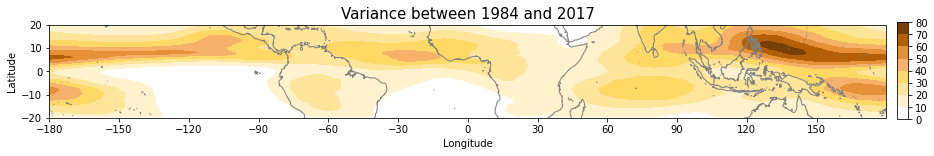

In [9]:
# Setting up the figure
fig,ax=plt.subplots(1,1,figsize = (15,15),subplot_kw = {"projection":ccrs.PlateCarree()})
ax.coastlines(color='grey')
# my own color bar
cmap=mplc.ListedColormap(list(reversed(['#783f04','#b45f06','#e69138','#f6b26b','#ffd966','#ffe599','#fff2cc','#ffffff'])))


# Filled contours of the variance
pl = ax.contourf(da["lon"],da["lat"],variance,cmap=cmap,transform=ccrs.PlateCarree())

# Labels
ax.set_title('Variance between 1984 and 2017',fontsize=15) 
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Tick marks
ax.set_xticks(np.arange(-180,180,30))
ax.set_yticks([-20,-10,0,10,20])


# color bar 
cax=fig.add_axes([0.91,0.458,0.01,0.09]) #Left, bottom, width, height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10)

# Notes for the future
# 1) get rid of the white line, and shift the plot westward( x-axis -180) 
# 2) if I want to plot grid lines the default is true

#### 1.4 Variance by Season

In [10]:
# Winter variance
wint = da.sel(time = da.time.dt.month.isin([12, 1, 2]))
wint_var = wint.var(dim = 'time')
# wint_var

In [11]:
# lon = wint_var.lon
# lat = wint_var.lat
# brtmp_c, lon_c = add_cyclic_point(wint_var.brtmp,coord=lon)

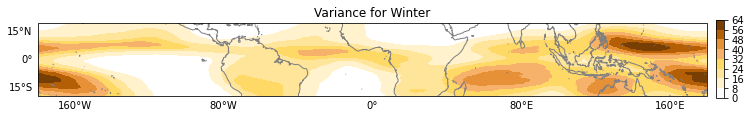

In [12]:
# Winter Variance Plot (final)

# Setting up the figure
fig, ax = plt.subplots(1,1, figsize=(12,12), subplot_kw = {'projection' : ccrs.Mercator()})
ax.coastlines(color='grey')
# my own colorbar
cmap=mplc.ListedColormap(list(reversed(['#783f04','#b45f06','#e69138','#f6b26b','#ffd966','#ffe599','#fff2cc','#ffffff'])))


# Filled contours of the winter variance
pl=ax.contourf(wint_var.lon, wint_var.lat, wint_var.brtmp,cmap=cmap, transform = ccrs.PlateCarree())

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid.ylines=False
grid.xlines=False
# grid.xlabels_top = False
grid.top_labels = False
grid.right_labels=False
grid.xlocator = mticker.FixedLocator([-160,-80,0,80,160])
grid.ylocator = mticker.FixedLocator([-15,0,15])
# can also do the np.arrange for the x and y ticks to add more or do this manually !

# Titles
plt.title('Variance for Winter')
# plt.xlabel('Longitude',color='grey')
# plt.ylabel('Latitude')

# color bar
cax=fig.add_axes([0.91,0.458,0.01,0.09]) #Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10)

In [13]:
# Spring variance
spring = da.sel(time = da.time.dt.month.isin([3, 4, 5]))
spring_var = spring.var(dim = 'time')
# spring_var

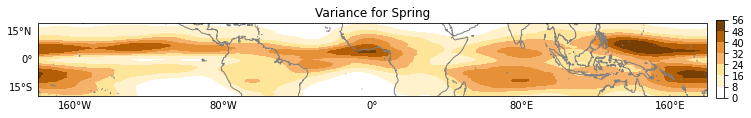

In [14]:
# Spring variance plot (final)

# Setting up the figure
fig, ax = plt.subplots(1,1, figsize=(12,12), subplot_kw = {'projection' : ccrs.Mercator()})
ax.coastlines(color='grey')
# my own colorbar
cmap=mplc.ListedColormap(list(reversed(['#783f04','#b45f06','#e69138','#f6b26b','#ffd966','#ffe599','#fff2cc','#ffffff'])))

# Filled contours of the spring variance
pl=ax.contourf(spring_var.lon, spring_var.lat, spring_var.brtmp,cmap=cmap, transform = ccrs.PlateCarree())

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid.ylines=False
grid.xlines=False
grid.top_labels = False
grid.right_labels=False
grid.xlocator = mticker.FixedLocator([-160,-80,0,80,160])
grid.ylocator = mticker.FixedLocator([-15,0,15])

plt.title('Variance for Spring')

# Color bar
cax=fig.add_axes([0.91,0.458,0.01,0.09]) #Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10);

In [15]:
# Summer variance
summer = da.sel(time = da.time.dt.month.isin([6, 7, 8]))
summer_var = summer.var(dim = 'time')
# summer_var

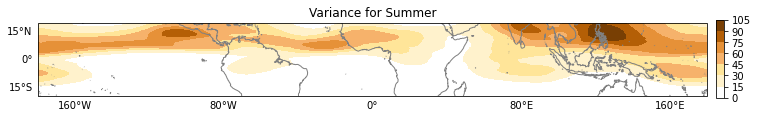

In [16]:
# Summer variance plot (final)

# Setting up the figure
fig, ax = plt.subplots(1,1, figsize=(12,12), subplot_kw = {'projection' : ccrs.Mercator()})
ax.coastlines(color='grey')
# my own colobar
cmap=mplc.ListedColormap(list(reversed(['#783f04','#b45f06','#e69138','#f6b26b','#ffd966','#ffe599','#fff2cc','#ffffff'])))


# Filled contours of the summer variance
pl=ax.contourf(summer_var.lon, summer_var.lat, summer_var.brtmp,cmap=cmap, transform = ccrs.PlateCarree())

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid.ylines=False
grid.xlines=False
grid.top_labels = False
grid.right_labels=False
grid.xlocator = mticker.FixedLocator([-160,-80,0,80,160])
grid.ylocator = mticker.FixedLocator([-15,0,15])

# Title
plt.title('Variance for Summer')

# Color bar
cax=fig.add_axes([0.91,0.458,0.01,0.09]) #Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10);

In [17]:
# Fall variance
fall = da.sel(time = da.time.dt.month.isin([9, 10, 11]))
fall_var = fall.var(dim = 'time')
# fall_var

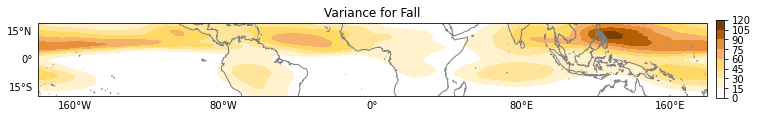

In [18]:
# Fall variance plot (final)

# Setting up the figure
fig, ax = plt.subplots(1,1, figsize=(12,12), subplot_kw = {'projection' : ccrs.Mercator()})
ax.coastlines(color='grey')
cmap=mplc.ListedColormap(list(reversed(['#783f04','#b45f06','#e69138','#f6b26b','#ffd966','#ffe599','#fff2cc','#ffffff'])))


# Filled contours of the  fall variance
pl=ax.contourf(fall_var.lon, fall_var.lat, fall_var.brtmp,cmap=cmap,transform = ccrs.PlateCarree())

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid.ylines=False
grid.xlines=False
grid.top_labels = False
grid.right_labels=False
grid.xlocator = mticker.FixedLocator([-160,-80,0,80,160])
grid.ylocator = mticker.FixedLocator([-15,0,15])

# Title
plt.title('Variance for Fall')

# Color bar
cax=fig.add_axes([0.91,0.458,0.01,0.09]) #Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10);

## Part 2: New Data - focus on climatology! This is where I build off my research for the project.

---
For this part I will calculate the climatology ( in other words the mean of the total column water vapor for the whole dataset, for the seasons, certain months instead of by seasons and for a certain region  I'm interested in.

In [19]:
# Opening new data
ds = xr.open_mfdataset('/tornado/home1/class/fall22/amodelska/final_project_modelska/era5_global_TCWV_2.5_1x_1980_2018.nc',combine='by_coords',data_vars='minimal')
ds

<xarray.Dataset>
Dimensions:    (time: 14245, bnds: 2, lon: 144, lat: 73)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T09:00:00 ... 2018-12-31T09:00:00
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat        (lat) float64 -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(14245, 2), meta=np.ndarray>
    tcwv       (time, lat, lon) float32 dask.array<chunksize=(14245, 73, 144), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Sat Sep 02 12:15:38 2023: cdo daymean era5_global_TCWV_2.5_...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

#### 2.1 Looking at the data

In [20]:
ds.tcwv
# ds['tcwv']

<xarray.DataArray 'tcwv' (time: 14245, lat: 73, lon: 144)>
dask.array<open_dataset-904a5e4f4e831e064c511fd472d2db0ftcwv, shape=(14245, 73, 144), dtype=float32, chunksize=(14245, 73, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T09:00:00 ... 2018-12-31T09:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
Attributes:
    standard_name:  lwe_thickness_of_atmosphere_mass_content_of_water_vapor
    long_name:      Total column water vapour
    units:          kg m**-2
    cell_methods:   time: mean

In [21]:
# The attributes for the total column water vapor
ds.tcwv.attrs

{'standard_name': 'lwe_thickness_of_atmosphere_mass_content_of_water_vapor',
 'long_name': 'Total column water vapour',
 'units': 'kg m**-2',
 'cell_methods': 'time: mean'}

In [22]:
# Mean of total column water vapor
mean_h20= ds.tcwv.mean(dim='time')
# mean_h20

In [23]:
# To get rid of the white line in the middle of the plot
lon= mean_h20.lon
lat=mean_h20.lat
mean_h20_cyc, lon_cyc = add_cyclic_point(mean_h20,coord=lon)

#### 2.2 Plotting the mean column water vapor (for the whole dataset)

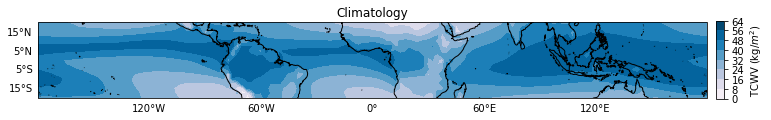

In [24]:
#Climatology plot for the whole dataset -- doing mean of the total column water vapor

# Setting up the figure 
fig,ax=plt.subplots(1,1,figsize=(12,12),subplot_kw = {'projection' : ccrs.Mercator()})
ax.coastlines(color='black')

# Filled contours for the climatology
pl=ax.contourf(lon_cyc, mean_h20.lat, mean_h20_cyc, cmap=plt.cm.PuBu, transform = ccrs.PlateCarree())

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid.ylines=False
grid.xlines=False
grid.top_labels = False
grid.right_labels=False
ax.set_extent([0,360,-20,20], ccrs.PlateCarree())

# Title
plt.title('Climatology')

# Color bar
cax=fig.add_axes([0.91,0.458,0.01,0.09]) #Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('TCWV (kg/$m^{2}$)')

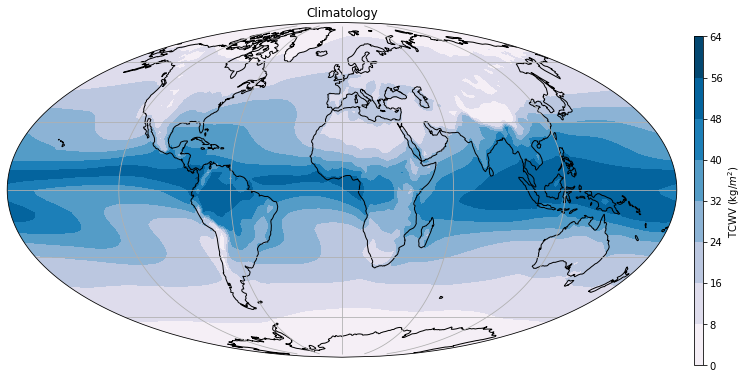

In [25]:
#Climatology plot but now using a different type of projection!

# Setting up the figure
fig,ax=plt.subplots(1,1,figsize=(12,12),subplot_kw = {'projection' : ccrs.Mollweide()})
ax.coastlines(color='black')

# Filled contours of the climatology
pl=ax.contourf(lon_cyc, mean_h20.lat, mean_h20_cyc, cmap=plt.cm.PuBu, transform = ccrs.PlateCarree())

# Since it is a different projection I don't need to specify the grid lines
grid = ax.gridlines(crs=ccrs.PlateCarree())

# Title
plt.title('Climatology')

# Color bar
cax=fig.add_axes([0.92,0.30,0.01,.38]) #Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('TCWV (kg/$m^{2}$)')

#### 2.3 The climatology but by season

In [26]:
# Winter climatology 
winter = ds.sel(time = ds.time.dt.month.isin([12, 1, 2]))
winter_mean = winter.tcwv.mean(dim = 'time')
# winter_mean

In [27]:
# Adding a cyclic point to get rid of the white line
lon= mean_h20.lon
winter_cyc, lon_cyc = add_cyclic_point(winter_mean,coord=lon)

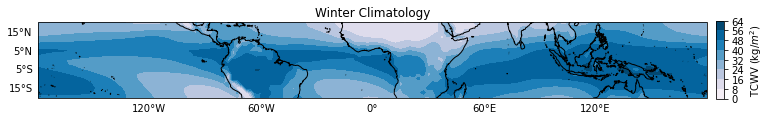

In [28]:
# Winter Climatology 

# Setting up the figure 
fig,ax=plt.subplots(1,1,figsize=(12,12),subplot_kw = {'projection' : ccrs.Mercator()})
ax.coastlines(color='black')

# Filled contours for the winter climatology
pl=ax.contourf(lon_cyc, mean_h20.lat, winter_cyc, cmap=plt.cm.PuBu,transform = ccrs.PlateCarree())

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid.ylines=False
grid.xlines=False
grid.top_labels = False
grid.right_labels=False
ax.set_extent([0,360,-20,20], ccrs.PlateCarree())
# set_extent([x_int, x_final, y_int,y_final)

# Title
plt.title('Winter Climatology')

# Color bar
cax=fig.add_axes([0.91,0.458,0.01,0.09]) #Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('TCWV (kg/$m^{2}$)')

In [29]:
# Spring Climatology
spring = ds.sel(time = ds.time.dt.month.isin([3, 4, 5]))
spring_mean = spring.tcwv.mean(dim = 'time')
# spring_mean

In [30]:
# Adding a cyclic point 
lon = mean_h20.lon
spring_cyc, lon_cyc = add_cyclic_point(spring_mean,coord=lon)

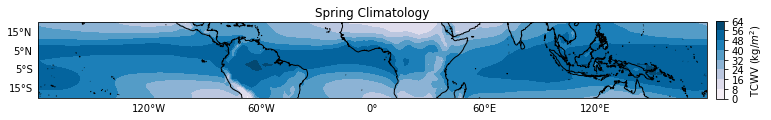

In [31]:
# Spring Climatology 

# Setting up the figure
fig,ax=plt.subplots(1,1,figsize=(12,12),subplot_kw = {'projection' : ccrs.Mercator()})
ax.coastlines(color='black')

# Filled contours for the spring climatology
pl=ax.contourf(lon_cyc, mean_h20.lat, spring_cyc, cmap=plt.cm.PuBu, transform = ccrs.PlateCarree())

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid.ylines=False
grid.xlines=False
grid.top_labels = False
grid.right_labels=False
ax.set_extent([0,360,-20,20], ccrs.PlateCarree())
# set_extent([x_int, x_final, y_int,y_final)

# Title
plt.title('Spring Climatology')

# Color bar
cax=fig.add_axes([0.91,0.458,0.01,0.09]) #Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('TCWV (kg/$m^{2}$)')

In [32]:
# Summer climatology
summer = ds.sel(time = ds.time.dt.month.isin([6, 7, 8]))
summer_mean = summer.tcwv.mean(dim = 'time')
# summer_mean

In [33]:
# Adding a cyclic point 
lon = mean_h20.lon
summer_cyc, lon_cyc = add_cyclic_point(summer_mean,coord=lon)

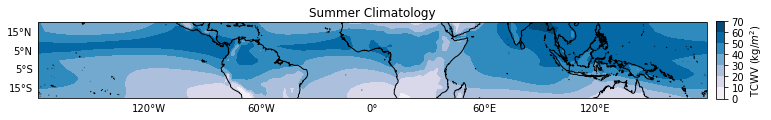

In [34]:
# Summer Climatology 

# Setting up the figure
fig,ax=plt.subplots(1,1,figsize=(12,12),subplot_kw = {'projection' : ccrs.Mercator()})
ax.coastlines(color='black')

# Filled contours for the summer climatology
pl=ax.contourf(lon_cyc, mean_h20.lat, summer_cyc, cmap=plt.cm.PuBu, transform = ccrs.PlateCarree())

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid.ylines=False
grid.xlines=False
grid.top_labels = False
grid.right_labels=False
ax.set_extent([0,360,-20,20], ccrs.PlateCarree())
# set_extent([x_int, x_final, y_int,y_final)

# Title
plt.title('Summer Climatology')

# Color bar
cax=fig.add_axes([0.91,0.458,0.01,0.09]) #Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('TCWV (kg/$m^{2}$)')

In [35]:
# Fall climatology
fall = ds.sel(time = ds.time.dt.month.isin([9, 10, 11]))
fall_mean = fall.tcwv.mean(dim = 'time')
# fall_mean

In [36]:
# Adding a cyclic point 
lon = mean_h20.lon
fall_cyc, lon_cyc = add_cyclic_point(fall_mean,coord=lon)

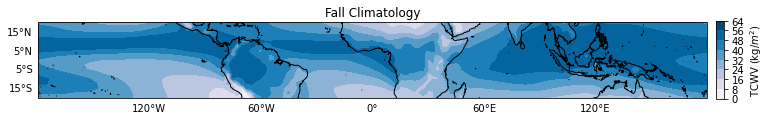

In [37]:
# Fall Climatology 

# Setting up the figure
fig,ax=plt.subplots(1,1,figsize=(12,12),subplot_kw = {'projection' : ccrs.Mercator()})
ax.coastlines(color='black')

# Filled contours for the fall climatology
pl=ax.contourf(lon_cyc, mean_h20.lat, fall_cyc, cmap=plt.cm.PuBu, transform = ccrs.PlateCarree())

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid.ylines=False
grid.xlines=False
grid.top_labels = False
grid.right_labels=False
ax.set_extent([0,360,-20,20], ccrs.PlateCarree())
# set_extent([x_int, x_final, y_int,y_final)

# Title
plt.title('Fall Climatology')

# Color bar
cax=fig.add_axes([0.91,0.458,0.01,0.09]) #Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('TCWV (kg/$m^{2}$)')

#### 2.4 Season Climatology but now for a particular area of interest

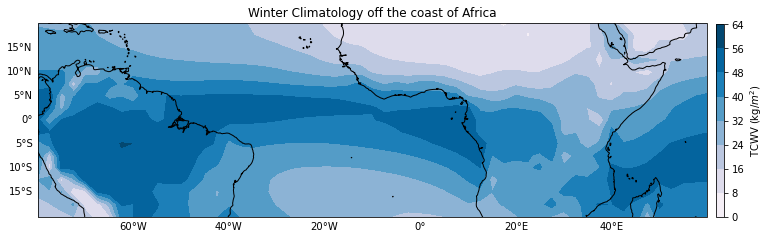

In [38]:
# Winter Climatology for Easterly Waves off the coast of Africa

# Setting up the figure 
fig,ax=plt.subplots(1,1,figsize=(12,12),subplot_kw = {'projection' : ccrs.Mercator()})
ax.coastlines(color='black')

# Filled contours for the winter climatology
pl=ax.contourf(lon_cyc, mean_h20.lat, winter_cyc, cmap=plt.cm.PuBu,transform = ccrs.PlateCarree())

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid.ylines=False
grid.xlines=False
grid.top_labels = False
grid.right_labels=False
ax.set_extent([-80,60,-20,20], ccrs.PlateCarree()) 
# The above are the coordinates for the west coast of Africa of course in the tropics
# set_extent([x_int, x_final, y_int,y_final)

# Title
plt.title('Winter Climatology off the coast of Africa')

# Color bar
cax=fig.add_axes([0.91,0.39,0.01,.223])#Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('TCWV (kg/$m^{2}$)')

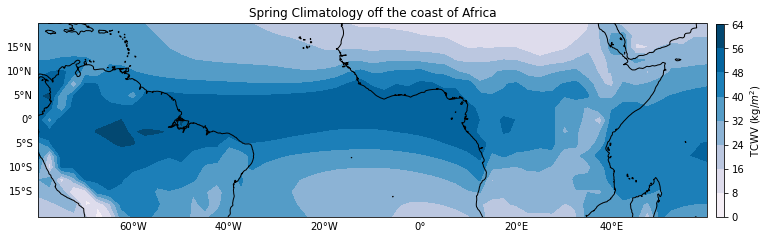

In [39]:
# Spring Climatology for Easterly waves off the coast of Africa

# Setting up the figure
fig,ax=plt.subplots(1,1,figsize=(12,12),subplot_kw = {'projection' : ccrs.Mercator()})
ax.coastlines(color='black')

# Filled contours for the spring climatology
pl=ax.contourf(lon_cyc, mean_h20.lat, spring_cyc, cmap=plt.cm.PuBu, transform = ccrs.PlateCarree())

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid.ylines=False
grid.xlines=False
grid.top_labels = False
grid.right_labels=False
ax.set_extent([-80,60,-20,20], ccrs.PlateCarree())
# set_extent([x_int, x_final, y_int,y_final)

# Title
plt.title('Spring Climatology off the coast of Africa')

# Color bar
cax=fig.add_axes([0.91,0.39,0.01,.223]) #Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('TCWV (kg/$m^{2}$)')

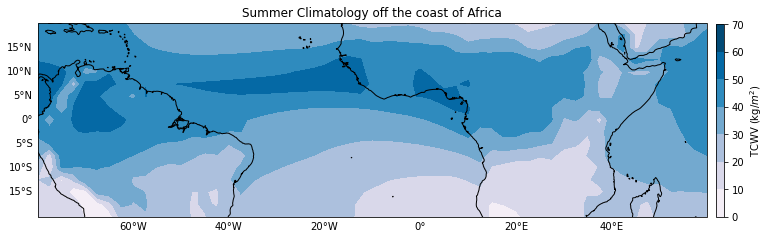

In [40]:
# Summer Climatology for Easterly Waves off the coast of Africa

# Setting up the figure
fig,ax=plt.subplots(1,1,figsize=(12,12),subplot_kw = {'projection' : ccrs.Mercator()})
ax.coastlines(color='black')

# Filled contours for the summer climatology
pl=ax.contourf(lon_cyc, mean_h20.lat, summer_cyc, cmap=plt.cm.PuBu, transform = ccrs.PlateCarree())

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid.ylines=False
grid.xlines=False
grid.top_labels = False
grid.right_labels=False
ax.set_extent([-80,60,-20,20], ccrs.PlateCarree())
# set_extent([x_int, x_final, y_int,y_final)

# Title
plt.title('Summer Climatology off the coast of Africa')

# Color bar
cax=fig.add_axes([0.91,0.39,0.01,.223]) #Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('TCWV (kg/$m^{2}$)')

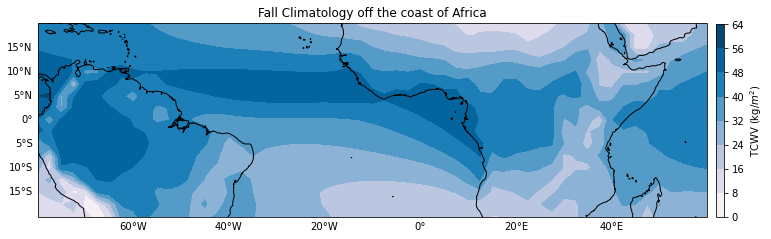

In [41]:
# Fall Climatology for Easterly Waves off the coast of Africa

# Setting up the figure
fig,ax=plt.subplots(1,1,figsize=(12,12),subplot_kw = {'projection' : ccrs.Mercator()})
ax.coastlines(color='black')

# Filled contours for the fall climatology
pl=ax.contourf(lon_cyc, mean_h20.lat, fall_cyc, cmap=plt.cm.PuBu, transform = ccrs.PlateCarree())

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid.ylines=False
grid.xlines=False
grid.top_labels = False
grid.right_labels=False
ax.set_extent([-80,60,-20,20], ccrs.PlateCarree())
# set_extent([x_int, x_final, y_int,y_final)

# Title
plt.title('Fall Climatology off the coast of Africa')

# Color bar
cax=fig.add_axes([0.91,0.39,0.01,.223]) #Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('TCWV (kg/$m^{2}$)')

#### 2.5 Climatology for specific months

##### 2.5.1 Climatology for April,May,June July

In [42]:
# Mixed month climatology
mx_month = ds.sel(time = ds.time.dt.month.isin([4,5,6,7]))
mx_mean = mx_month.tcwv.mean(dim = 'time')

In [43]:
# Adding a cyclic point 
lon = mean_h20.lon
mx_cyc, lon_cyc = add_cyclic_point(mx_mean,coord=lon)

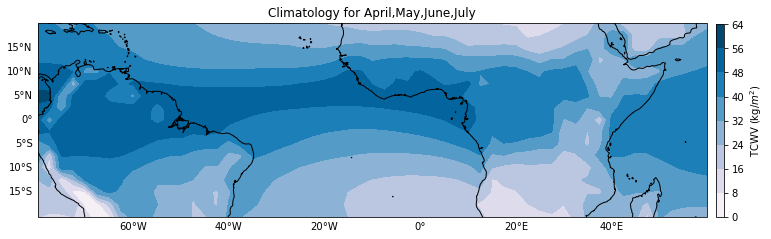

In [44]:
# Mixed Month (April,May,June,July) Climatology 

# Setting up the figure
fig,ax=plt.subplots(1,1,figsize=(12,12),subplot_kw = {'projection' : ccrs.Mercator()})
ax.coastlines(color='black')

# Filled contours for the mixed month climatology
pl=ax.contourf(lon_cyc, mean_h20.lat, mx_cyc, cmap=plt.cm.PuBu, transform = ccrs.PlateCarree())

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid.ylines=False
grid.xlines=False
grid.top_labels = False
grid.right_labels=False
ax.set_extent([-80,60,-20,20], ccrs.PlateCarree())
# set_extent([x_int, x_final, y_int,y_final)

# Title
plt.title('Climatology for April,May,June,July')

# Color bar
cax=fig.add_axes([0.91,0.39,0.01,.223]) #Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('TCWV (kg/$m^{2}$)')

##### 2.5.2 Climatology for Septmeber,October,November,December,January

In [45]:
sondj_month = ds.sel(time = ds.time.dt.month.isin([9,10,11,12,1]))
sondj_mean = sondj_month.tcwv.mean(dim = 'time')

In [46]:
# Adding a cyclic point 
lon = mean_h20.lon
sondj_cyc, lon_cyc = add_cyclic_point(sondj_mean,coord=lon)

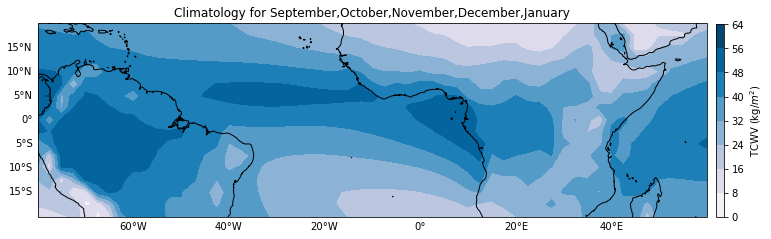

In [47]:
# Mixed Month (September,October,November,December,January) Climatology 

# Setting up the figure
fig,ax=plt.subplots(1,1,figsize=(12,12),subplot_kw = {'projection' : ccrs.Mercator()})
ax.coastlines(color='black')

# Filled contours for the mixed month climatology
pl=ax.contourf(lon_cyc, mean_h20.lat, sondj_cyc, cmap=plt.cm.PuBu, transform = ccrs.PlateCarree())

grid = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
grid.ylines=False
grid.xlines=False
grid.top_labels = False
grid.right_labels=False
ax.set_extent([-80,60,-20,20], ccrs.PlateCarree())
# set_extent([x_int, x_final, y_int,y_final)

# Title
plt.title('Climatology for September,October,November,December,January')

# Color bar
cax=fig.add_axes([0.91,0.39,0.01,.223]) #Left or right, bottom, width, top/height
cbar=plt.colorbar(pl,cax=cax,orientation='vertical',shrink=.1)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('TCWV (kg/$m^{2}$)')

## Part 3: Atlas of the Climatology 

---
The first part of this is actually calculating the mean of the total column water vapor for each month. The secon half of this section is actually creating the graph.

#### 3.1 Calculating the mean of the tcwv for each month 
---
I had each month be it's seperate cell not with the intent to make this notebook longer but to make it more coherent and to fix my mistake so easily then having one huge cell with all the months. 

In [48]:
# January
jan_month = ds.sel(time = ds.time.dt.month.isin([1]))
jan_mean = jan_month.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
jan_cyc, lon_cyc = add_cyclic_point(jan_mean,coord=lon)

In [49]:
# February
feb_month = ds.sel(time = ds.time.dt.month.isin([2]))
feb_mean = feb_month.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
feb_cyc, lon_cyc = add_cyclic_point(feb_mean,coord=lon)

In [50]:
# March
mar_month = ds.sel(time = ds.time.dt.month.isin([3]))
mar_mean = mar_month.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
mar_cyc, lon_cyc = add_cyclic_point(mar_mean,coord=lon)

In [51]:
# April
apr_month = ds.sel(time = ds.time.dt.month.isin([4]))
apr_mean = apr_month.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
apr_cyc, lon_cyc = add_cyclic_point(apr_mean,coord=lon)

In [52]:
# May
may_month = ds.sel(time = ds.time.dt.month.isin([5]))
may_mean = may_month.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
may_cyc, lon_cyc = add_cyclic_point(may_mean,coord=lon)

In [53]:
# June
jun_month = ds.sel(time = ds.time.dt.month.isin([6]))
jun_mean = jun_month.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
jun_cyc, lon_cyc = add_cyclic_point(jun_mean,coord=lon)

In [54]:
# July
jul_month = ds.sel(time = ds.time.dt.month.isin([7]))
jul_mean = jul_month.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
jul_cyc, lon_cyc = add_cyclic_point(jul_mean,coord=lon)

In [55]:
# August
aug_month = ds.sel(time = ds.time.dt.month.isin([8]))
aug_mean = aug_month.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
aug_cyc, lon_cyc = add_cyclic_point(aug_mean,coord=lon)

In [56]:
# September
sep_month = ds.sel(time = ds.time.dt.month.isin([9]))
sep_mean = sep_month.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
sep_cyc, lon_cyc = add_cyclic_point(sep_mean,coord=lon)

In [57]:
# October
oct_month = ds.sel(time = ds.time.dt.month.isin([10]))
oct_mean = oct_month.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
oct_cyc, lon_cyc = add_cyclic_point(oct_mean,coord=lon)

In [58]:
# November
nov_month = ds.sel(time = ds.time.dt.month.isin([11]))
nov_mean = nov_month.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
nov_cyc, lon_cyc = add_cyclic_point(nov_mean,coord=lon)

In [59]:
# December
dec_month = ds.sel(time = ds.time.dt.month.isin([12]))
dec_mean = dec_month.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
dec_cyc, lon_cyc = add_cyclic_point(dec_mean,coord=lon)

#### 3.2 Doing the actual plotting

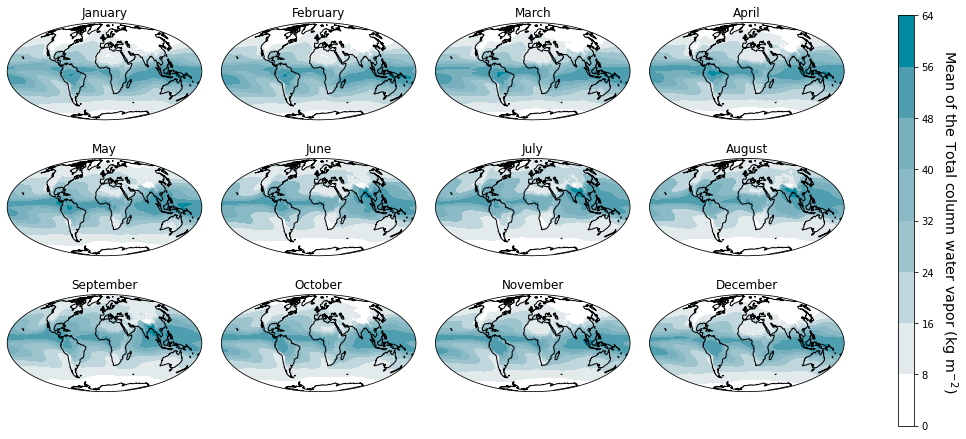

In [60]:
# Monthly Climatology 

# Setting up the figures
fig,ax=plt.subplots(3,4,figsize=(15,15),subplot_kw = {'projection' : ccrs.Mollweide()})
axs=ax.flatten()
plt.subplots_adjust(hspace=-0.75,wspace=0.1)
# Color map
cmap=mplc.ListedColormap(list(reversed(['#008ba1','#4e9eb0','#78b0be','#8abac6','#9dc3cd','#c0d6dd','#e2eaec','#ffffff'])))

# January
axs[0].add_feature(cfeature.COASTLINE)
cs=axs[0].contourf(lon_cyc, mean_h20.lat, jan_cyc, cmap=cmap, transform = ccrs.PlateCarree())
axs[0].set_title('January')

# February
axs[1].add_feature(cfeature.COASTLINE)
axs[1].contourf(lon_cyc, mean_h20.lat, feb_cyc, cmap=cmap, transform = ccrs.PlateCarree())
axs[1].set_title('February')

# March
axs[2].add_feature(cfeature.COASTLINE)
axs[2].contourf(lon_cyc, mean_h20.lat, mar_cyc, cmap=cmap, transform = ccrs.PlateCarree())
axs[2].set_title('March')

# April
axs[3].add_feature(cfeature.COASTLINE)
axs[3].contourf(lon_cyc, mean_h20.lat, apr_cyc, cmap=cmap, transform = ccrs.PlateCarree())
axs[3].set_title('April')

# May
axs[4].add_feature(cfeature.COASTLINE)
axs[4].contourf(lon_cyc, mean_h20.lat, may_cyc, cmap=cmap, transform = ccrs.PlateCarree())
axs[4].set_title('May')

# June
axs[5].add_feature(cfeature.COASTLINE)
axs[5].contourf(lon_cyc, mean_h20.lat, jun_cyc, cmap=cmap, transform = ccrs.PlateCarree())
axs[5].set_title('June')

# July
axs[6].add_feature(cfeature.COASTLINE)
axs[6].contourf(lon_cyc, mean_h20.lat, jul_cyc, cmap=cmap, transform = ccrs.PlateCarree())
axs[6].set_title('July')

# August
axs[7].add_feature(cfeature.COASTLINE)
axs[7].contourf(lon_cyc, mean_h20.lat, aug_cyc, cmap=cmap, transform = ccrs.PlateCarree())
axs[7].set_title('August')

# September
axs[8].add_feature(cfeature.COASTLINE)
axs[8].contourf(lon_cyc, mean_h20.lat, sep_cyc, cmap=cmap, transform = ccrs.PlateCarree())
axs[8].set_title('September')

# October
axs[9].add_feature(cfeature.COASTLINE)
axs[9].contourf(lon_cyc, mean_h20.lat, oct_cyc, cmap=cmap, transform = ccrs.PlateCarree())
axs[9].set_title('October')

# November
axs[10].add_feature(cfeature.COASTLINE)
axs[10].contourf(lon_cyc, mean_h20.lat, nov_cyc, cmap=cmap, transform = ccrs.PlateCarree())
axs[10].set_title('November')

# December
axs[11].add_feature(cfeature.COASTLINE)
axs[11].contourf(lon_cyc, mean_h20.lat, dec_cyc, cmap=cmap, transform = ccrs.PlateCarree())
axs[11].set_title('December')

# Color bar
cax=fig.add_axes([0.95,0.3,0.015,0.38]) #Left, bottom, width, height
cbar=plt.colorbar(cs,cax=cax,orientation='vertical', pad=0.03)
# Had to make one of the months my cs since all of the plots have the same color bar
cbar.set_label('Mean of the Total column water vapor (kg m$^{-2}$)',size='x-large',rotation=270, va='bottom')

## Part 4: Plot of the Variance and Climatology

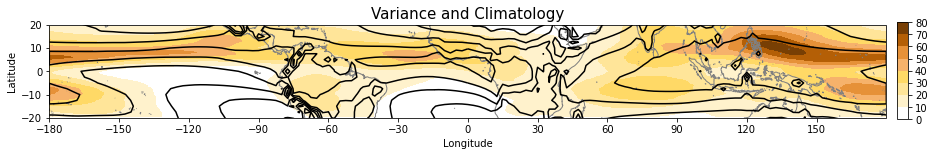

In [61]:
# Plotting variance and climatology for the whole dataset

# Setting the figure
fig,ax=plt.subplots(1,1,figsize = (15,15),subplot_kw = {"projection":ccrs.PlateCarree()})
ax.coastlines(color='grey')
# my own colorbar
cmap=mplc.ListedColormap(list(reversed(['#783f04','#b45f06','#e69138','#f6b26b','#ffd966','#ffe599','#fff2cc','#ffffff'])))

# Variance shading
cf = ax.contourf(da["lon"],da["lat"],variance,cmap=cmap,transform=ccrs.PlateCarree())
ax.contour(lon_cyc, mean_h20.lat, mean_h20_cyc,colors='black')

# Titles
ax.set_title('Variance and Climatology',fontsize=15) 
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.set_xticks(np.arange(-180,180,30))
ax.set_yticks([-20,-10,0,10,20])
ax.set_extent([-180,180,-20,20], ccrs.PlateCarree())

# color bar 
cax=fig.add_axes([0.91,0.458,0.01,0.09]) #Left, bottom, width, height
cbar=plt.colorbar(cf,cax=cax,orientation='vertical',pad=0.03)
cbar.ax.tick_params(labelsize=10)

## Part 5: Variance and Climatology for each month

#### 5.1 Calculating the variance and men tcwv for each month

In [62]:
# January
# Calculating the varinace
v1 = da.sel(time = da.time.dt.month.isin([1]))
jan_var = v1.var(dim = 'time')

# Calculating the climatology
c1 = ds.sel(time = ds.time.dt.month.isin([1]))
jan_clim = c1.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
jan_clim_cyc, lon_cyc = add_cyclic_point(jan_clim,coord=lon)

In [63]:
# February 
v2 = da.sel(time = da.time.dt.month.isin([2]))
feb_var = v2.var(dim = 'time')

# Calculating the climatology
c2 = ds.sel(time = ds.time.dt.month.isin([2]))
feb_clim = c2.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
feb_clim_cyc, lon_cyc = add_cyclic_point(feb_clim,coord=lon)

In [64]:
# March
v3 = da.sel(time = da.time.dt.month.isin([3]))
mar_var = v3.var(dim = 'time')

# Calculating the climatology
c3 = ds.sel(time = ds.time.dt.month.isin([3]))
mar_clim = c3.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
mar_clim_cyc, lon_cyc = add_cyclic_point(mar_clim,coord=lon)

In [65]:
# April
v4 = da.sel(time = da.time.dt.month.isin([4]))
apr_var = v4.var(dim = 'time')

# Calculating the climatology
c4 = ds.sel(time = ds.time.dt.month.isin([4]))
apr_clim = c4.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
apr_clim_cyc, lon_cyc = add_cyclic_point(apr_clim,coord=lon)

In [66]:
# May
v5 = da.sel(time = da.time.dt.month.isin([5]))
may_var = v5.var(dim = 'time')

# Calculating the climatology
c5 = ds.sel(time = ds.time.dt.month.isin([5]))
may_clim = c5.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
may_clim_cyc, lon_cyc = add_cyclic_point(may_clim,coord=lon)

In [67]:
# June
v6 = da.sel(time = da.time.dt.month.isin([6]))
jun_var = v6.var(dim = 'time')

# Calculating the climatology
c6 = ds.sel(time = ds.time.dt.month.isin([6]))
jun_clim = c6.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
jun_clim_cyc, lon_cyc = add_cyclic_point(jun_clim,coord=lon)

In [68]:
# July
v7 = da.sel(time = da.time.dt.month.isin([7]))
jul_var = v7.var(dim = 'time')

# Calculating the climatology
c7 = ds.sel(time = ds.time.dt.month.isin([7]))
jul_clim = c7.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
jul_clim_cyc, lon_cyc = add_cyclic_point(jul_clim,coord=lon)

In [69]:
# August
v8 = da.sel(time = da.time.dt.month.isin([8]))
aug_var = v8.var(dim = 'time')

# Calculating the climatology
c8 = ds.sel(time = ds.time.dt.month.isin([8]))
aug_clim = c8.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
aug_clim_cyc, lon_cyc = add_cyclic_point(aug_clim,coord=lon)

In [70]:
# September
v9 = da.sel(time = da.time.dt.month.isin([9]))
sep_var = v9.var(dim = 'time')

# Calculating the climatology
c9 = ds.sel(time = ds.time.dt.month.isin([9]))
sep_clim = c9.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
sep_clim_cyc, lon_cyc = add_cyclic_point(sep_clim,coord=lon)

In [71]:
# October
v10= da.sel(time = da.time.dt.month.isin([10]))
oct_var = v10.var(dim = 'time')

# Calculating the climatology
c10 = ds.sel(time = ds.time.dt.month.isin([10]))
oct_clim = c10.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
oct_clim_cyc, lon_cyc = add_cyclic_point(oct_clim,coord=lon)

In [72]:
# November
v11 = da.sel(time = da.time.dt.month.isin([11]))
nov_var = v11.var(dim = 'time')

# Calculating the climatology
c11 = ds.sel(time = ds.time.dt.month.isin([11]))
nov_clim = c11.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
nov_clim_cyc, lon_cyc = add_cyclic_point(nov_clim,coord=lon)

In [73]:
# December
v12 = da.sel(time = da.time.dt.month.isin([12]))
dec_var = v12.var(dim = 'time')

# Calculating the climatology
c12 = ds.sel(time = ds.time.dt.month.isin([12]))
dec_clim = c12.tcwv.mean(dim = 'time')

# Adding a cyclic point 
lon = mean_h20.lon
dec_clim_cyc, lon_cyc = add_cyclic_point(dec_clim,coord=lon)

#### 5.2 Plotting both parameters = Atlas

/opt/anaconda3/envs/aos573/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


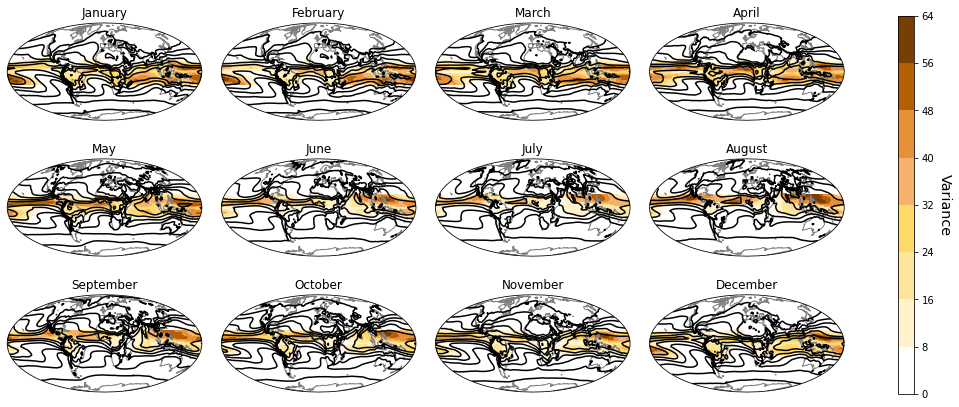

In [74]:
# Setting up the plots

# Setting up the figures
fig,ax=plt.subplots(3,4,figsize=(15,15),subplot_kw = {'projection' : ccrs.Mollweide()})
axs=ax.flatten()
plt.subplots_adjust(hspace=-0.75,wspace=0.1)

# Color map
cmap=mplc.ListedColormap(list(reversed(['#783f04','#b45f06','#e69138','#f6b26b','#ffd966','#ffe599','#fff2cc','#ffffff'])))


# Plots: contour fill [variance] and contours [climatology]

# January 
axs[0].add_feature(cfeature.COASTLINE,color='grey')
cf=axs[0].contourf(jan_var.lon,jan_var.lat,jan_var.brtmp,cmap=cmap,transform=ccrs.PlateCarree())
axs[0].contour(lon_cyc,mean_h20.lat,jan_clim_cyc,colors='black',transform=ccrs.PlateCarree())
axs[0].set_title('January')

# February
axs[1].add_feature(cfeature.COASTLINE,color='grey')
axs[1].contourf(feb_var.lon,feb_var.lat,feb_var.brtmp,cmap=cmap,transform=ccrs.PlateCarree())
axs[1].contour(lon_cyc,mean_h20.lat,feb_clim_cyc,colors='black',transform=ccrs.PlateCarree())
axs[1].set_title('February')


# March
axs[2].add_feature(cfeature.COASTLINE,color='grey')
axs[2].contourf(mar_var.lon,mar_var.lat,mar_var.brtmp,cmap=cmap,transform=ccrs.PlateCarree())
axs[2].contour(lon_cyc,mean_h20.lat,mar_clim_cyc,colors='black',transform=ccrs.PlateCarree())
axs[2].set_title('March')


# April
axs[3].add_feature(cfeature.COASTLINE,color='grey')
axs[3].contourf(apr_var.lon,apr_var.lat,apr_var.brtmp,cmap=cmap,transform=ccrs.PlateCarree())
axs[3].contour(lon_cyc,mean_h20.lat,apr_clim_cyc,colors='black',transform=ccrs.PlateCarree())
axs[3].set_title('April')


# May
axs[4].add_feature(cfeature.COASTLINE,color='grey')
axs[4].contourf(may_var.lon,may_var.lat,may_var.brtmp,cmap=cmap,transform=ccrs.PlateCarree())
axs[4].contour(lon_cyc,mean_h20.lat,may_clim_cyc,colors='black',transform=ccrs.PlateCarree())
axs[4].set_title('May')


# June
axs[5].add_feature(cfeature.COASTLINE,color='grey')
axs[5].contourf(jun_var.lon,jun_var.lat,jun_var.brtmp,cmap=cmap,transform=ccrs.PlateCarree())
axs[5].contour(lon_cyc,mean_h20.lat,jun_clim_cyc,colors='black',transform=ccrs.PlateCarree())
axs[5].set_title('June')


# July 
axs[6].add_feature(cfeature.COASTLINE,color='grey')
axs[6].contourf(jul_var.lon,jul_var.lat,jul_var.brtmp,cmap=cmap,transform=ccrs.PlateCarree())
axs[6].contour(lon_cyc,mean_h20.lat,jul_clim_cyc,colors='black',transform=ccrs.PlateCarree())
axs[6].set_title('July')


# August
axs[7].add_feature(cfeature.COASTLINE,color='grey')
axs[7].contourf(aug_var.lon,aug_var.lat,aug_var.brtmp,cmap=cmap,transform=ccrs.PlateCarree())
axs[7].contour(lon_cyc,mean_h20.lat,aug_clim_cyc,colors='black',transform=ccrs.PlateCarree())
axs[7].set_title('August')

# September
axs[8].add_feature(cfeature.COASTLINE,color='grey')
axs[8].contourf(sep_var.lon,sep_var.lat,sep_var.brtmp,cmap=cmap,transform=ccrs.PlateCarree())
axs[8].contour(lon_cyc,mean_h20.lat,sep_clim_cyc,colors='black',transform=ccrs.PlateCarree())
axs[8].set_title('September')


# October
axs[9].add_feature(cfeature.COASTLINE,color='grey')
axs[9].contourf(oct_var.lon,oct_var.lat,oct_var.brtmp,cmap=cmap,transform=ccrs.PlateCarree())
axs[9].contour(lon_cyc,mean_h20.lat,oct_clim_cyc,colors='black',transform=ccrs.PlateCarree())
axs[9].set_title('October')


# November
axs[10].add_feature(cfeature.COASTLINE,color='grey')
axs[10].contourf(nov_var.lon,nov_var.lat,nov_var.brtmp,cmap=cmap,transform=ccrs.PlateCarree())
axs[10].contour(lon_cyc,mean_h20.lat,nov_clim_cyc,colors='black',transform=ccrs.PlateCarree())
axs[10].set_title('November')


# December
axs[11].add_feature(cfeature.COASTLINE,color='grey')
axs[11].contourf(dec_var.lon,dec_var.lat,dec_var.brtmp,cmap=cmap,transform=ccrs.PlateCarree())
axs[11].contour(lon_cyc,mean_h20.lat,dec_clim_cyc,colors='black',transform=ccrs.PlateCarree())
axs[11].set_title('December')

# color bar 
cax=fig.add_axes([0.95,0.33,0.015,0.35]) #Left, bottom, width, height
cbar=plt.colorbar(cf,cax=cax,orientation='vertical',pad=0.03)
# Had to make one of the months my cf since all of the plots have the same color bar for variance
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Variance',size='x-large',rotation=270, va='bottom')

These plots look a little too small and they only plot in the tropics since the data set I used for variance doesn't include data beyond the tropics. I initally wanted to add the contour values but I feel like the plots, will be too overwhelming hence why I didn't add them.